# Linear Regression -2 Wine Data Set

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import linear_model
# For splitting train and test data
from sklearn.model_selection import train_test_split

### Load Wine Data set from sklearn and print it


In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine['DESCR']) # Print Description of the data set wine


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## From the description of the data set we can see that there are 3 classes of wine

In [3]:
print(wine) # Print whole data set

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

### Transform the Data Set into Data Frame with the help of Pandas

In [4]:
# data - the data we want or the independent variables also known as the x values
# feature_names - the column names of the data
# target - the target varable or the price of the houses or dependent variable also known as the y value

df_x = pd.DataFrame(wine.data, columns= wine.feature_names)
df_y = pd.DataFrame(wine.target)
x,y = wine['data'],wine['target']

In [5]:
# Get some statistics from the data set, count, mean
df_x.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Plot Histogram of Wine Data Set


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

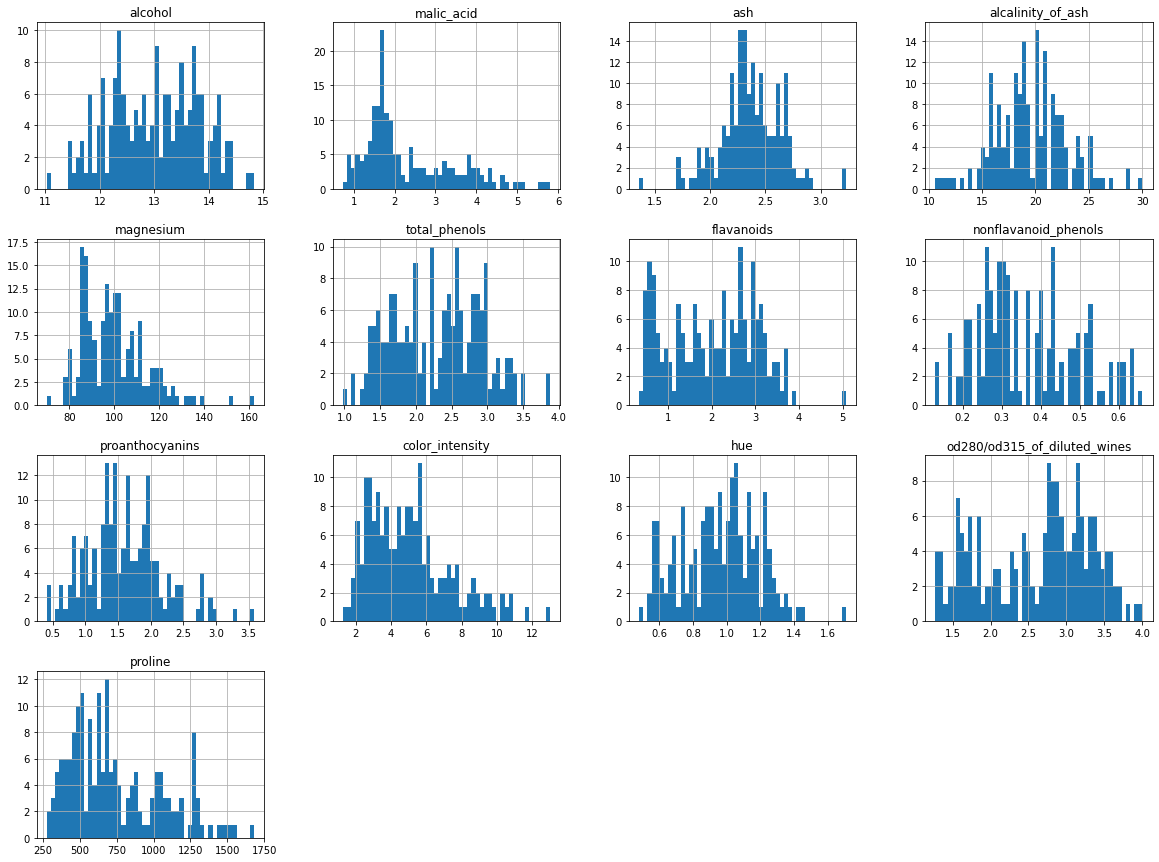

In [7]:
df_x.hist(bins=50, figsize=(20, 15))

### Shuffling the data and Splitting Train-Test Data

In [8]:
# Split the data into 67% training and 33% testing data
x_train, x_test = x[:120], x[120:178]
y_train, y_test = y[:120], y[120:178]
# , y_train, y_test = train_test_split(df_x,df_y,test_size = 0.33, random_state = 42)
#Shuffling the data
shuffle_index = np.random.permutation(120) # Since x_train.shape = 119
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

### Correlation Between Data set

In [9]:
corr_matrix = df_x.corr()
corr_matrix['hue'].sort_values(ascending=False) # Relation of hue with different data set
# This signifies the impact of particular feature in type of wine

hue                             1.000000
od280/od315_of_diluted_wines    0.565468
flavanoids                      0.543479
total_phenols                   0.433681
proanthocyanins                 0.295544
proline                         0.236183
magnesium                       0.055398
alcohol                        -0.071747
ash                            -0.074667
nonflavanoid_phenols           -0.262640
alcalinity_of_ash              -0.273955
color_intensity                -0.521813
malic_acid                     -0.561296
Name: hue, dtype: float64

<AxesSubplot:xlabel='hue', ylabel='alcohol'>

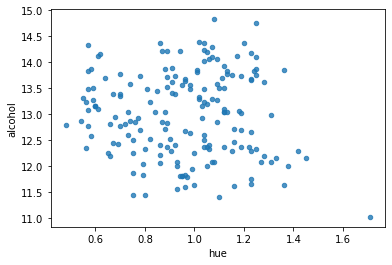

In [10]:
df_x.plot(kind="scatter", x="hue", y="alcohol", alpha=0.8)

<AxesSubplot:xlabel='ash', ylabel='alcohol'>

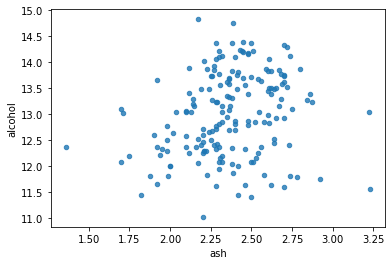

In [11]:
df_x.plot(kind="scatter", x="ash", y="alcohol", alpha=0.8)

### Pipeline For Linear Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression()

In [14]:
clf.fit(x_train, y_train) # Fitting the training data

c:\python3.700\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [15]:
y_predict = clf.predict(x_test) # Predicting the y value on test data

### Cross Validation to determine accuracy

In [16]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(clf,x_train,y_train, cv = 3, scoring ="accuracy")

c:\python3.700\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python3.700\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

In [17]:
accuracy
# accuracy array is determining the accuracy of our model in each type of wine below

array([0.975, 0.925, 0.975])

In [18]:
accuracy.mean()

0.9583333333333334

### Confusion matrix and F-1 Score

###### Here we are using confusion matrix and f-1 score, since it provide the detail of model prediction better then cross validation accuracy

In [19]:

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train,y_train, cv = 3)

c:\python3.700\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python3.700\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

In [20]:
y_train_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

### Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
confusion_matrix(y_train, y_train_pred)

array([[57,  2],
       [ 3, 58]], dtype=int64)

### Precision and Recall

In [23]:
from sklearn.metrics import precision_score, recall_score


In [24]:
precision_score(y_train, y_train_pred)

0.9666666666666667

In [25]:
recall_score(y_train, y_train_pred)

0.9508196721311475

### F-1 Score

In [26]:
from sklearn.metrics import f1_score


In [27]:
f1_score(y_train,y_train_pred)

0.9586776859504132

## Here we get good score of accuracy and f-1 score, hence our model is very well fitted